In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def extract_data(path, tag):
    """extract from summary file.
    Args:
        path: path to the file
    """
    events = tf.train.summary_iterator(path)
    data = []
    for e in events:
        for v in e.summary.value:
            if v.tag == tag:
                data.append(v.simple_value)
    return data

In [3]:
def window_average(x, pos, window=[0, 250]):
    #ind = int(window_size / 2)
    return np.mean(x[pos + window[0]: pos + window[1]])

In [5]:
"""cell
"""
convpath = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0704-000108/logdir/validate/events.out.tfevents.1530655329.teufelskapelle'
trajpath = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0704-133430/logdir/validate/events.out.tfevents.1530704117.teufelskapelle'
flowpath = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0704-233855/logdir/validate/events.out.tfevents.1530740364.teufelskapelle'
fourierpath = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0705-131207/logdir/validate/events.out.tfevents.1530789154.teufelskapelle'
"""predictor

convsimplepath = '../latest_experiments/TrajGRU0703-135555/logdir/validate/events.out.tfevents.1530619241.auersberg'
#convtcn2path = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0622-130939/logdir/validate/events.out.tfevents.1529665882.teufelskapelle'
#convtcn4path = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0621-143851/logdir/validate/events.out.tfevents.1529584760.teufelskapelle'
#convtcn2pathL = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0618-0011/logdir/validate/events.out.tfevents.1529273561.teufelskapelle'
"""

"predictor\n\nconvsimplepath = '../latest_experiments/TrajGRU0703-135555/logdir/validate/events.out.tfevents.1530619241.auersberg'\n#convtcn2path = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0622-130939/logdir/validate/events.out.tfevents.1529665882.teufelskapelle'\n#convtcn4path = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0621-143851/logdir/validate/events.out.tfevents.1529584760.teufelskapelle'\n#convtcn2pathL = '../latest_experiments/MovingMNIST/Predictor/StridedConvGRU0618-0011/logdir/validate/events.out.tfevents.1529273561.teufelskapelle'\n"

In [7]:
#tag_name = "reconstruct_loss_1"
tag_name = "pred_loss_1"
convdata = extract_data(convpath, tag_name)
convdata = [window_average(convdata, i) for i, v in enumerate(convdata) if i % 100 == 0]

trajdata = extract_data(trajpath, tag_name)
trajdata = [window_average(trajdata, i) for i, v in enumerate(trajdata) if i % 100 == 0]

flowdata = extract_data(flowpath, tag_name)
flowdata = [window_average(flowdata, i) for i, v in enumerate(flowdata) if i % 100 == 0]

fourierdata = extract_data(fourierpath, tag_name)
fourierdata = [window_average(fourierdata, i) for i, v in enumerate(fourierdata) if i % 100 == 0]
#convtcn2data = extract_data(convtcn2path, tag_name)
#convtcn2data = [window_average(convtcn2data, i) for i, v in enumerate(convtcn2data) if i % 100 == 0]
#convtcn2dataL = extract_data(convtcn2pathL, tag_name)
#convtcn2dataL = [window_average(convtcn2dataL, i) for i, v in enumerate(convtcn2dataL) if i % 100 == 0]
#convtcn4data = extract_data(convtcn4path, tag_name)
#convtcn4data = [window_average(convtcn4data, i) for i, v in enumerate(convtcn4data) if i % 100 == 0] 

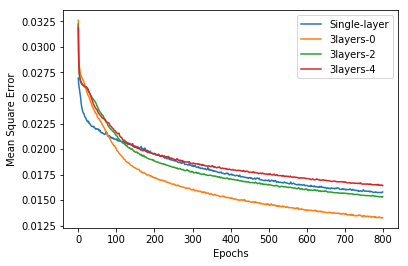

In [8]:
convind = np.arange(len(convdata))
trajind = np.arange(len(trajdata))
flowind = np.arange(len(flowdata))
fourierind = np.arange(len(fourierdata))
#convtcn2ind = np.arange(len(convtcn2data))
#convtcn2indL = np.arange(len(convtcn2dataL))
#convtcn4ind = np.arange(len(convtcn4data))
plt.plot(convind, convdata, label='Single-layer')
plt.plot(trajind, trajdata, label='3layers-0')
plt.plot(flowind, flowdata, label='3layers-2')
plt.plot(fourierind, fourierdata, label='3layers-4')
#plt.plot(convtcn2ind, convtcn2data, label='ConvGRU-tcn2')
#plt.plot(convtcn2indL, convtcn2dataL, label='ConvGRU-tcn2L')
#plt.plot(convtcn4ind, convtcn4data, label='ConvGRU-tcn4')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.savefig("./wolter/learning_curve.pdf")
plt.show()